# SYNTHETIZATION AND AUGMENTATION OF DATASET

In [ ]:
!pip install torch==1.13.1
! pip install sdv
! pip install faker
! pip install realtabformer

In [3]:
!pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from df_summary import *
from generator import *
from generator_augment import *
from similarity_check import *
from privacy_check import *


In [3]:
#we are using a dataset from kaggle. Don't forget to load a kaggle.json file before running this cell
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#DATASET 1
!kaggle datasets download -d incarnyx/car-insurance-fraud

!unzip car-insurance-fraud.zip

100% 1.82M/1.82M [00:01<00:00, 1.75MB/s]
100% 1.82M/1.82M [00:01<00:00, 1.54MB/s]
Archive:  car-insurance-fraud.zip
  inflating: Dataset.xlsx            


In [5]:
#DATASET 1
df = pd.read_excel("Dataset.xlsx")
pd.set_option('display.max_columns', None)

In [14]:
dataframe_summary(df,'summary.csv')


Number of rows of the dataset: 11565 

---- DATAFRAME SUMMARY -----
            column_names column_types            example
0                  Month       object                Mar
1            WeekOfMonth        int64                  3
2              DayOfWeek       object             Monday
3                   Make       object              Mazda
4           AccidentArea       object              Urban
5       DayOfWeekClaimed       object             Friday
6           MonthClaimed       object                Mar
7     WeekOfMonthClaimed        int64                  5
8                    Sex       object               Male
9          MaritalStatus       object            Married
10                   Age      float64               34.0
11                 Fault       object      Policy Holder
12            PolicyType       object  Sedan - Collision
13       VehicleCategory       object              Sport
14          VehiclePrice       object     30000 to 39000
15          FraudFou

In [6]:
target = 'FraudFound_P'
sensitive = ['Sex','MaritalStatus']
arch = 'RealTabFormer'

df['PastNumberOfClaims'] = df['PastNumberOfClaims'].astype("string").astype('object')
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].astype("string").astype('object')
df['MonthClaimed'] = df['MonthClaimed'].astype("string").astype('object')

## DATA GENERATION

In [7]:
metadata, aug = generator_augmentation(data = df,
                       architecture = arch,
                       n_samples_nofraud = 5000,
                       p_fraud = 0.2,
                       n_epochs_nofraud = 2,
                       n_epochs_fraud = 8,
                       n_boostrap = 50,
                       sensitive_columns = sensitive,
                       target_col = target
                       )

Retrieving metadata, check with generator.metadata
Retrieving metadata, check with generator.metadata
Computing the sensitivity threshold...


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:566: UserWarning: Duplicate rate (0.0) in the data is zero. The `qt_interval` will be set                     to qt_interval_unique=100.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:593: UserWarning: qt_interval adjusted from 100 to 89...
  warnings.warn(


Bootstrap round:   0%|          | 0/50 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    50.000000
mean      0.000356
std       0.002460
min      -0.005660
25%      -0.000753
50%       0.000467
75%       0.002117
max       0.006466
dtype: float64
Sensitivity threshold: 0.0033350129886388492 qt_max: 0.05


Map:   0%|          | 0/10880 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
100,1.383100
200,1.001800
300,0.962600
400,0.945400
500,0.934700
600,0.929000


  0%|          | 0/5385 [00:00<?, ?it/s]

Generated 1 invalid samples out of total 5504 samples generated. Sampling efficiency is: 99.9818%
Critic round: 5,                     sensitivity_threshold: 0.0033350129886388492,                         val_sensitivity: 0.0021287909611592713,                             val_sensitivities: [0.00017229507683640255, -0.0031114832086632693, 0.0009509874495320928, 0.003660135832994269, 0.0009509874495320928, 0.003953084410503581, 0.0038341522957027908, 0.006446903070326433, 0.002033895652718221, 0.007839034771994614, 0.0021778661074770707, 0.000412663140433786, 0.002875183875309064, 0.0001460048198804385, -0.00040984632718851067]


  0%|          | 0/5000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 5120 samples generated. Sampling efficiency is: 100.0000%
Computing the sensitivity threshold...


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:566: UserWarning: Duplicate rate (0.0) in the data is zero. The `qt_interval` will be set                     to qt_interval_unique=100.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:593: UserWarning: qt_interval adjusted from 100 to 5...
  warnings.warn(


Bootstrap round:   0%|          | 0/50 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    50.000000
mean      0.002412
std       0.012356
min      -0.020752
25%      -0.007920
50%       0.002257
75%       0.008274
max       0.042257
dtype: float64
Sensitivity threshold: 0.02138938053097344 qt_max: 0.05


Map:   0%|          | 0/685 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
100,1.505200


  0%|          | 0/339 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 384 samples generated. Sampling efficiency is: 100.0000%
Critic round: 5,                     sensitivity_threshold: 0.02138938053097344,                         val_sensitivity: 3.834808259586754e-05,                             val_sensitivities: [-0.017920353982300886, -0.010840707964601773, -0.001283185840707967, -0.009070796460176994, 0.001548672566371679, 0.00969026548672566, 0.0019026548672566347, 0.001548672566371679, 0.005796460176991148, 0.018539823008849553, 0.00898230088495575, -0.013672566371681419, -0.005530973451327437, 0.010398230088495572, 0.00048672566371681173]


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


0it [00:00, ?it/s]

Step,Training Loss


  0%|          | 0/339 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 384 samples generated. Sampling efficiency is: 100.0000%
Critic round: 10,                     sensitivity_threshold: 0.02138938053097344,                         val_sensitivity: -0.0014011799410029527,                             val_sensitivities: [-0.012610619469026552, -0.004115044247787613, -0.0005752212389380555, -0.00022123893805309978, 0.011460176991150439, 0.0011946902654867233, -0.011194690265486728, -0.00022123893805309978, -0.004115044247787613, 0.02207964601769911, -0.0019911504424778787, -0.012256637168141595, -0.00694690265486726, -0.0005752212389380555, -0.0009292035398230112]


  0%|          | 0/1000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1024 samples generated. Sampling efficiency is: 100.0000%


In [ ]:
aug

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Jan,1,Monday,Mazda,Urban,Wednesday,Jan,2,Male,Married,27.0,Policy Holder,Sedan - All Perils,Sedan,30000 to 39000,0,8615,5,400,3.0,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,All Perils,19089.1780
1,Jun,2,Sunday,Chevrolet,Urban,Thursday,Jul,2,Female,Single,42.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,0,6652,6,400,2.0,more than 30,more than 30,none,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1995,Collision,5815.4750
2,May,3,Friday,Pontiac,Urban,Monday,May,4,Female,Single,26.0,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,0,1821,6,400,3.0,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,All Perils,5369.5440
3,May,4,Monday,Mazda,Urban,Tuesday,May,5,Male,Married,33.0,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,7127,4,400,2.0,more than 30,more than 30,none,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1995,Liability,4604.5710
4,Jun,4,Monday,Pontiac,Urban,Monday,Jun,3,Male,Married,49.0,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,8725,13,400,1.0,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,more than 5,no change,1 vehicle,1995,Liability,74505.1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Jan,2,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,37.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,9084,5,400,2.0,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,2838.6077
5996,Dec,2,Saturday,Honda,Urban,Wednesday,Dec,3,Male,Married,33.0,Third Party,Sedan - Liability,Sport,30000 to 39000,0,8292,5,400,3.0,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,Liability,37713.0150
5997,Oct,3,Monday,Pontiac,Urban,Thursday,Oct,4,Male,Single,27.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,0,3433,13,400,1.0,more than 30,more than 30,1,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,4794.8990
5998,Jul,4,Tuesday,Ford,Rural,Monday,Jul,3,Male,Single,26.0,Policy Holder,Sedan - Liability,Sport,40000 to 59000,0,8941,1,400,1.0,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,Liability,50884.7500


## SIMILARITY SCORE

In [8]:
categorical_columns = []

for col in list(df):
  if df[col].dtypes == 'object':
    categorical_columns.append(col)

In [ ]:
similarity_checker = SimilarityCheck(df, aug, categorical_columns, metadata)

### COLUMN COMARISON

In [ ]:
similarity_checker.comparison_columns()

Creating report: 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]



Overall Quality Score: 96.69%

Properties:
Column Shapes: 97.58%
Column Pair Trends: 95.8%
                  Column        Metric  Quality Score
0            WeekOfMonth  KSComplement       0.990108
1     WeekOfMonthClaimed  KSComplement       0.985656
2                    Age  KSComplement       0.971015
3           FraudFound_P  KSComplement       0.892564
4           PolicyNumber  KSComplement       0.973225
5              RepNumber  KSComplement       0.988900
6             Deductible  KSComplement       0.994559
7           DriverRating  KSComplement       0.986476
8                   Year  KSComplement       0.972452
9              ClaimSize  KSComplement       0.981610
10                 Month  TVComplement       0.967652
11             DayOfWeek  TVComplement       0.971778
12                  Make  TVComplement       0.976486
13          AccidentArea  TVComplement       0.970960
14      DayOfWeekClaimed  TVComplement       0.976315
15          MonthClaimed  TVComplement      

### CORRELATION COMPARISON

/content/similarity_check.py:86: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diff_corr = abs(self.real_data.corr() - self.synthetic_data.corr())


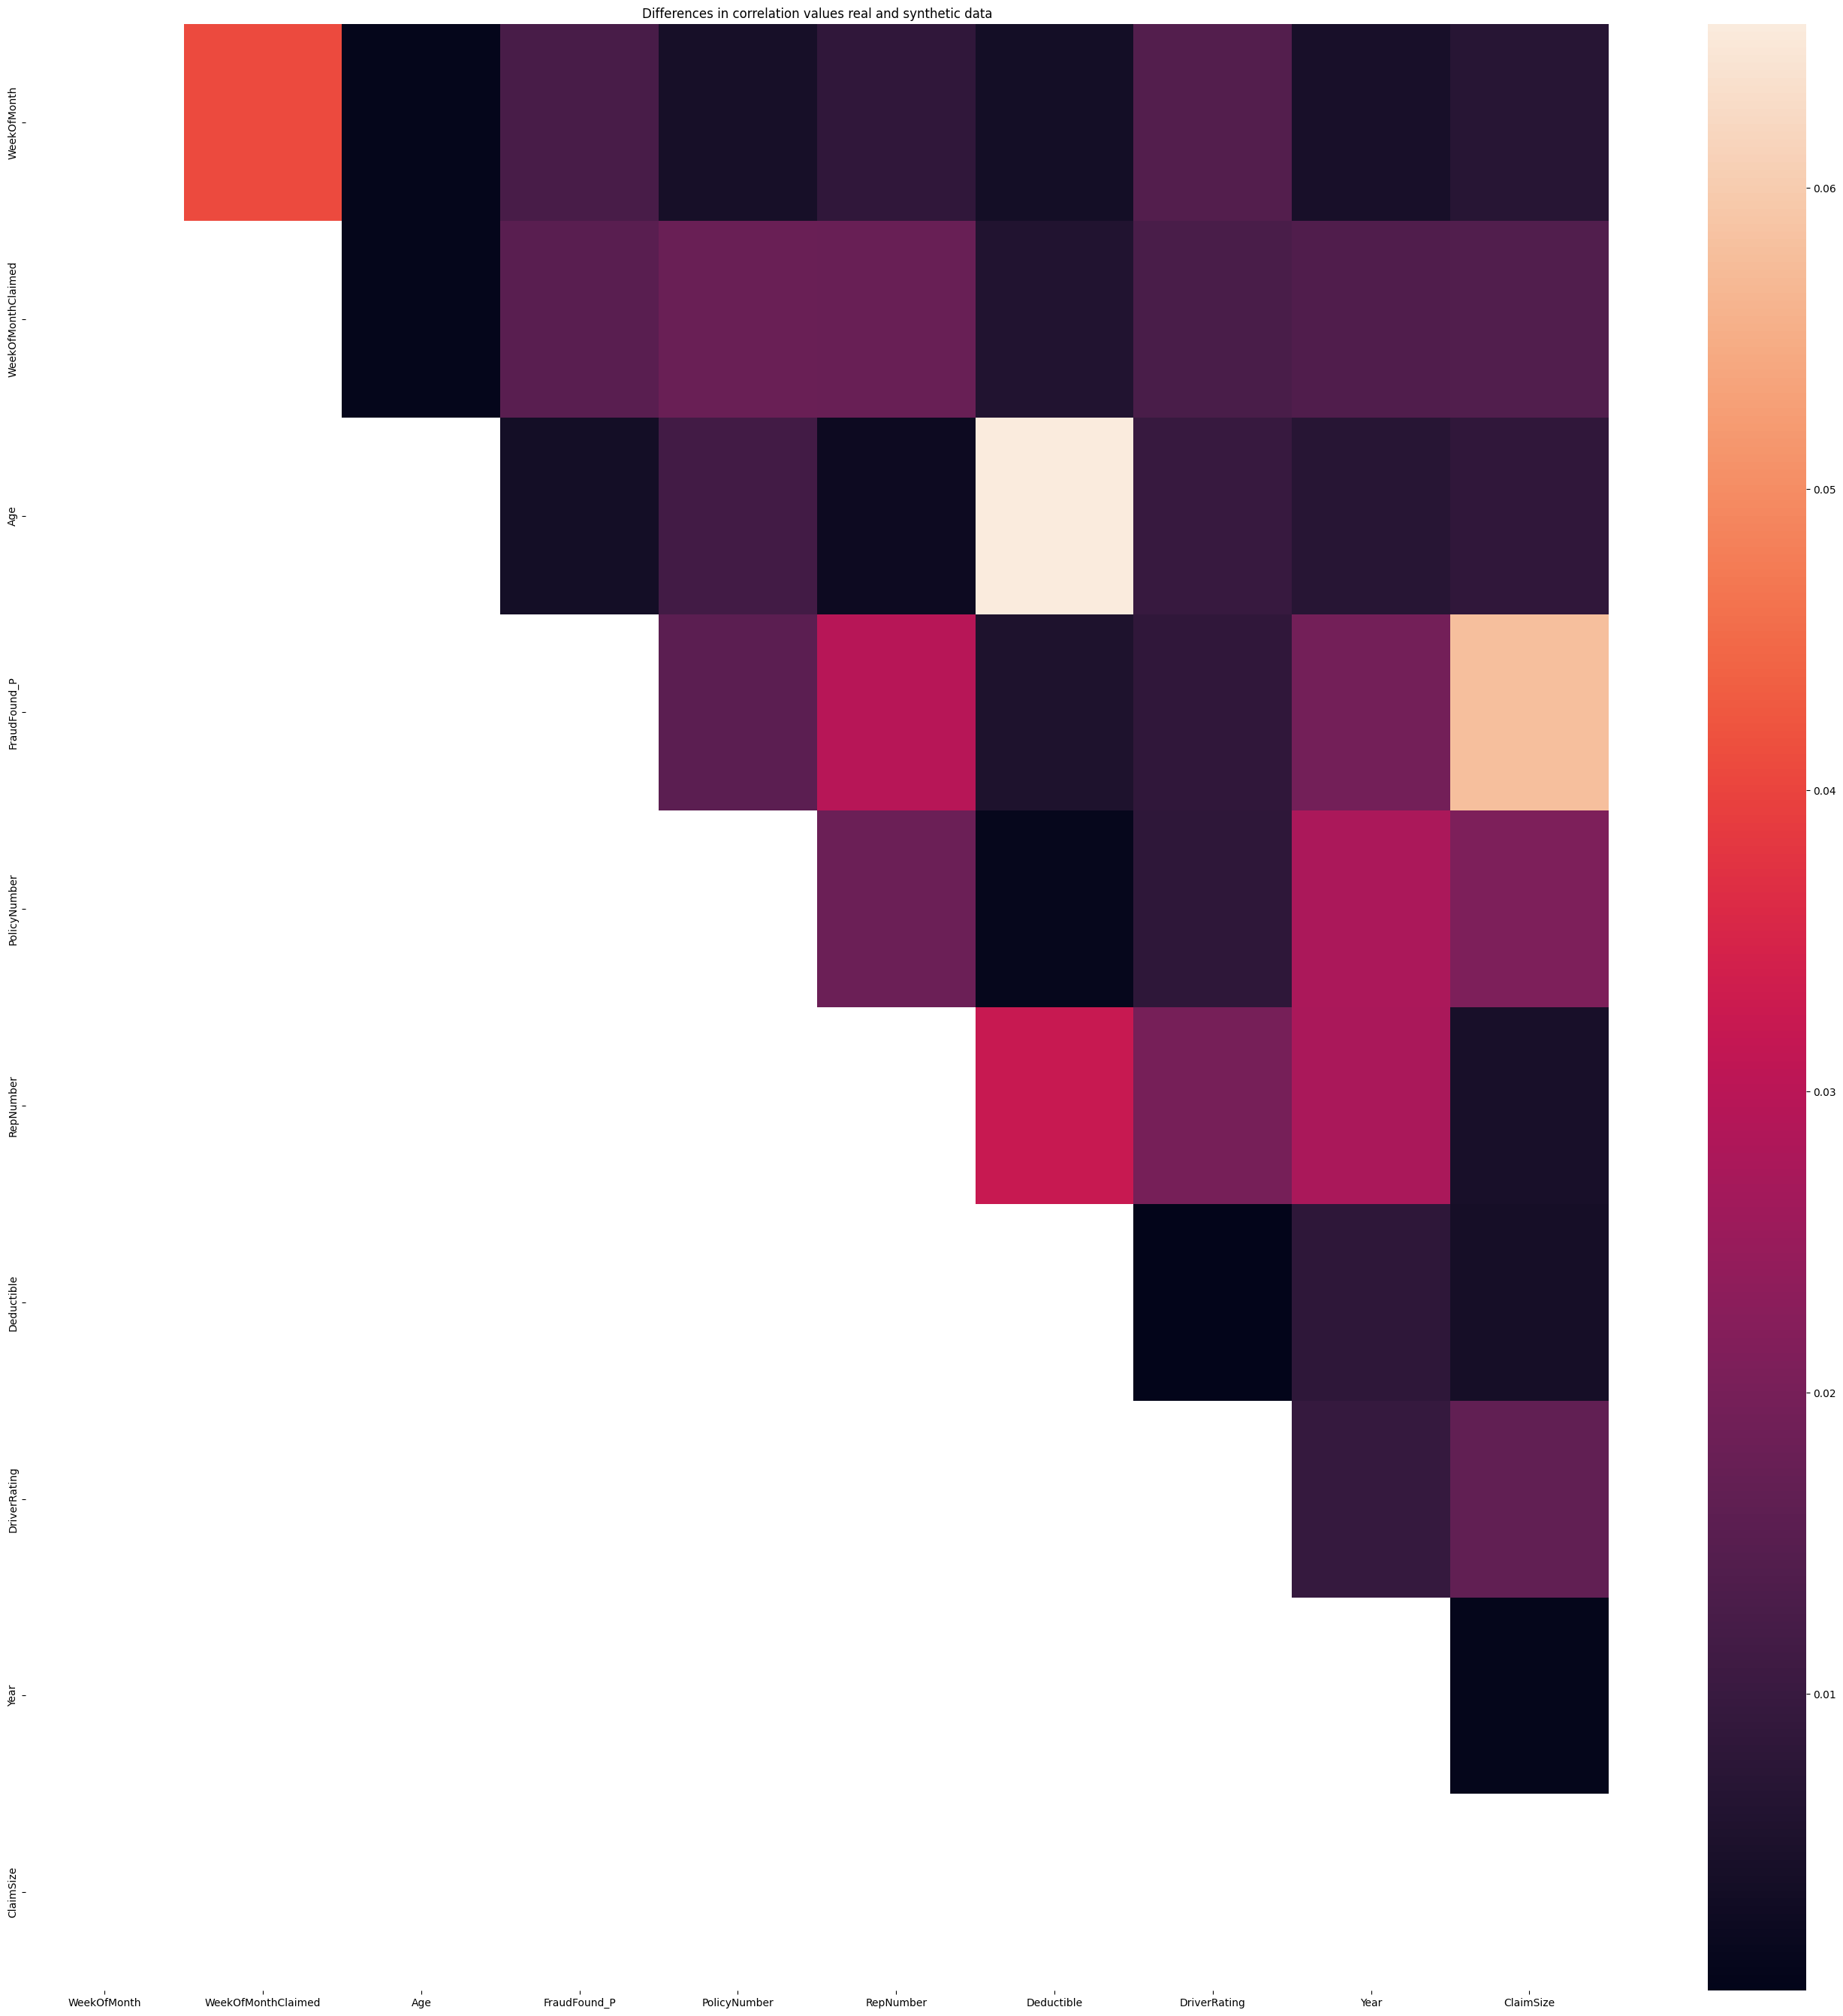

In [ ]:
similarity_checker.compare_correlations()

## PRIVACY SCORE

In [9]:
metadata = metadata.to_dict()

In [10]:
privacy = PrivacyCheck(df, aug, metadata)

In [ ]:
privacy.generate_report()

Creating report: 100%|██████████| 4/4 [03:27<00:00, 51.99s/it]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data


In [ ]:
privacy.get_visualization("Coverage")

In [11]:
# Compute privacy score - HIGH COMPUTATIONAL TIME - FIGURE OUT
privacy.generate_privacy_score()

Computing privacy score:   0%|          | 21/6000 [10:47<51:13:20, 30.84s/it]


KeyboardInterrupt: ignored

In [ ]:
score, pairs = privacy.get_privacy_score()